<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/Clustering/blob/main/Image/Image_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code uses a deep learning model to transform images into  feature space where similar images are close to each other. It then applies clustering to group similar images and visualizes these groups, helping in understanding the relationships between different images based on their visual content.







/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 1s 952ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


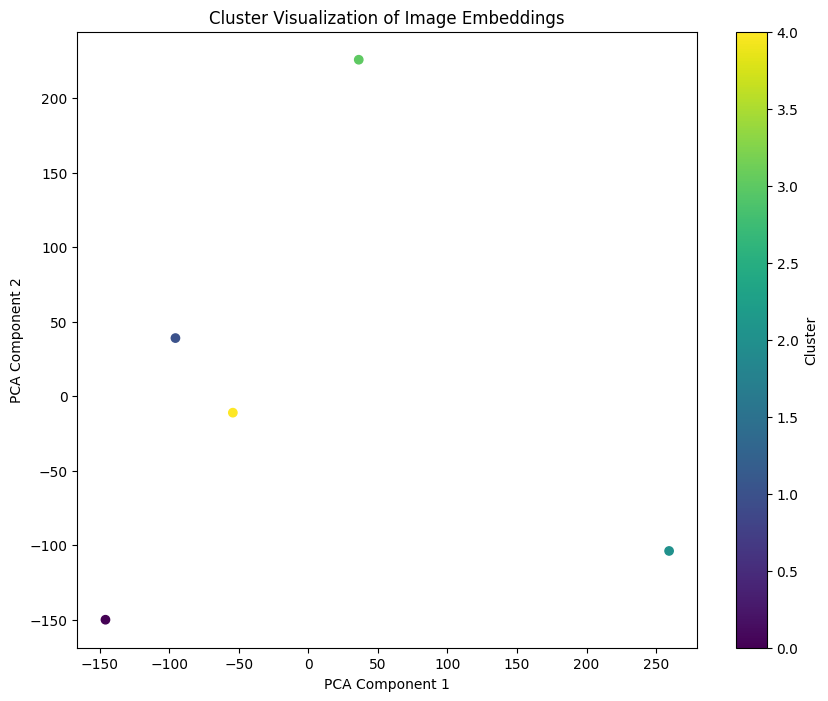

In [4]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model

# Function to load and preprocess images
def load_and_preprocess_images(image_paths):
    images = []
    for path in image_paths:
        img = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
    return np.array(images)

# Function to load a pretrained MobileNetV2 model
def load_feature_extractor():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)  # Using the last layer's output
    return model

# Function to extract embeddings using the pretrained model
def extract_embeddings(images, model):
    embeddings = model.predict(images)
    # Optional: Flatten or pool the embeddings
    embeddings = embeddings.reshape(embeddings.shape[0], -1)
    return embeddings

# Function to perform clustering
def perform_clustering(embeddings, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(embeddings)
    return kmeans.labels_

# Define your image paths
image_paths = [
    '/content/drive/MyDrive/DATA_MINING_DATASETS/img/images/images/absol.png',
    '/content/drive/MyDrive/DATA_MINING_DATASETS/img/images/images/espeon.png',
    '/content/drive/MyDrive/DATA_MINING_DATASETS/img/images/images/amaura.png',
    '/content/drive/MyDrive/DATA_MINING_DATASETS/img/images/images/arceus.png',
    '/content/drive/MyDrive/DATA_MINING_DATASETS/img/images/images/bonsly.png',
    ]

# Load and preprocess images
images = load_and_preprocess_images(image_paths)

# Load the pretrained model
feature_extractor = load_feature_extractor()

# Extract embeddings
embeddings = extract_embeddings(images, feature_extractor)

# Perform clustering
labels = perform_clustering(embeddings)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Visualization of Image Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
